In [130]:
import pandas as pd

In [131]:
data=pd.read_csv('/retail_store_sales.csv')
data.head()


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [132]:
print("rows="+str(data.shape[0]))
print("columns="+str(data.shape[1]))

rows=12575
columns=11


In [133]:
data.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,1213
Price Per Unit,609
Quantity,604
Total Spent,604
Payment Method,0
Location,0
Transaction Date,0


In [134]:
newdata=data.drop_duplicates()

In [135]:
print("rows="+str(newdata.shape[0]))
print("columns="+str(newdata.shape[1]))

rows=12575
columns=11


In [136]:
newdata.dtypes

,0
Transaction ID,object
Customer ID,object
Category,object
Item,object
Price Per Unit,float64
Quantity,float64
Total Spent,float64
Payment Method,object
Location,object
Transaction Date,object


In [137]:
newdata.drop('Discount Applied', axis=1, inplace=True)

In [138]:
newdata.drop('Transaction ID', axis=1, inplace=True)

In [139]:
newdata.drop('Category', axis=1, inplace=True)
newdata.drop('Payment Method', axis=1, inplace=True)
newdata.drop('Location', axis=1, inplace=True)


In [140]:
newdata.to_csv('retail_store_cleaned.csv', index=False)

In [141]:
#Extract month from the date and plot total sales per month.
newdata['Transaction Date']=pd.to_datetime(newdata['Transaction Date'])
newdata['month']=newdata['Transaction Date'].dt.month_name()

In [142]:
sales =newdata.groupby('month')['Total Spent'].sum()


In [143]:
import matplotlib.pyplot as plt

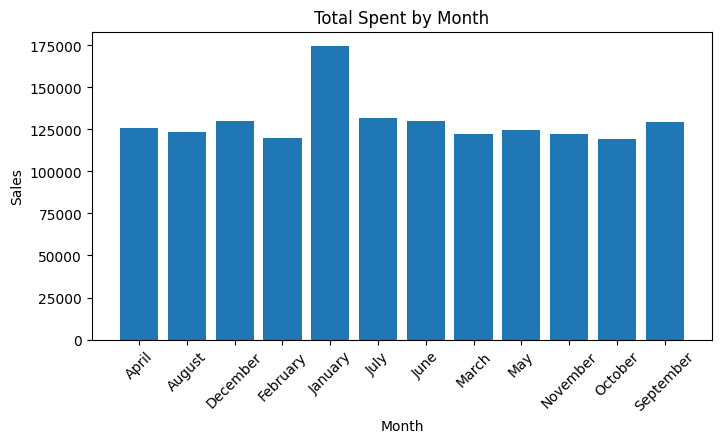

In [144]:
plt.figure(figsize=(8, 4))
plt.bar(sales.index, sales.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Spent by Month')
plt.xticks(rotation=45)
plt.show()

In [145]:
import seaborn as sns

In [146]:
newdata['Day'] = newdata['Transaction Date'].dt.day_name()
d= newdata.groupby(['Item', 'Day'])['Total Spent'].sum().reset_index()
d.sort_values(by='Total Spent', ascending=False)
pivot =d.pivot(index='Item', columns='Day', values='Total Spent')

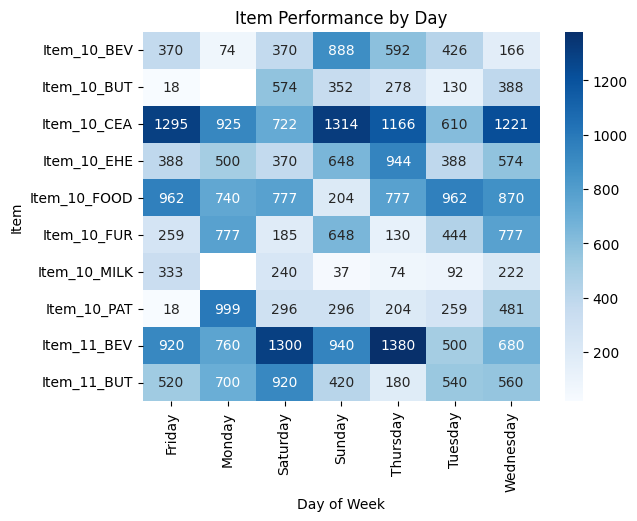

In [147]:
# Heatmap of Sales by Item and Day of Week:
#Identify which item perform better on which days.

sns.heatmap(pivot[:10], annot=True, fmt=".0f", cmap='Blues')
plt.title("Item Performance by Day")
plt.ylabel("Item")
plt.xlabel("Day of Week")
plt.show()

In [148]:
#Top 10 products by revenue.
product_revenue=newdata.groupby('Item')['Total Spent'].sum()
product_revenue[:10].sort_values(ascending=False)

,Total Spent
Item,
Item_10_CEA,7252.0
Item_11_BEV,6480.0
Item_10_FOOD,5291.0
Item_11_BUT,3840.0
Item_10_EHE,3811.0
Item_10_FUR,3219.0
Item_10_BEV,2886.0
Item_10_PAT,2553.0
Item_10_BUT,1739.0


In [149]:
#Top 10 products by quantity sold.
product_quantity=newdata.groupby('Item')['Quantity'].sum()
product_quantity[:10].sort_values(ascending=False)

,Quantity
Item,
Item_10_CEA,392.0
Item_11_BEV,324.0
Item_10_FOOD,286.0
Item_10_EHE,206.0
Item_11_BUT,192.0
Item_10_FUR,174.0
Item_10_BEV,156.0
Item_10_PAT,138.0
Item_10_BUT,94.0
